In [107]:
import pandas as pd
import numpy as np

In [108]:
# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("dataset.csv")
data.tail()

,Date,Open,High,Low,Close,Volume
37585,2017-12-18,2685.92,2694.97,2685.92,2690.16,608455168.0
37586,2017-12-19,2692.71,2694.44,2680.74,2681.47,556473472.0
37587,2017-12-20,2688.18,2691.01,2676.11,2679.25,521377568.0
37588,2017-12-21,2683.02,2692.64,2682.40,2684.57,511474976.0
37589,2017-12-22,2684.22,2685.35,2678.13,2683.34,NaN


In [109]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('dataset.csv', index_col='Date',date_parser=dateparse)
print data.tail()

               Open     High      Low    Close       Volume
Date                                                       
2017-12-18  2685.92  2694.97  2685.92  2690.16  608455168.0
2017-12-19  2692.71  2694.44  2680.74  2681.47  556473472.0
2017-12-20  2688.18  2691.01  2676.11  2679.25  521377568.0
2017-12-21  2683.02  2692.64  2682.40  2684.57  511474976.0
2017-12-22  2684.22  2685.35  2678.13  2683.34          NaN


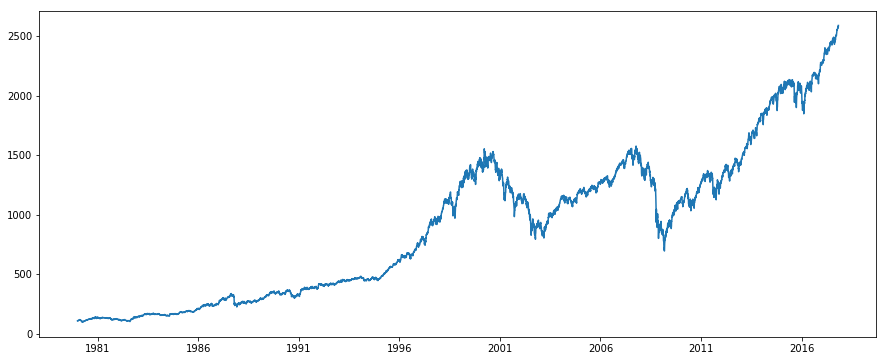

In [110]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
Actual_data = data['1980-01-01':'2017-11-30']
plt.plot(Actual_data['High'])

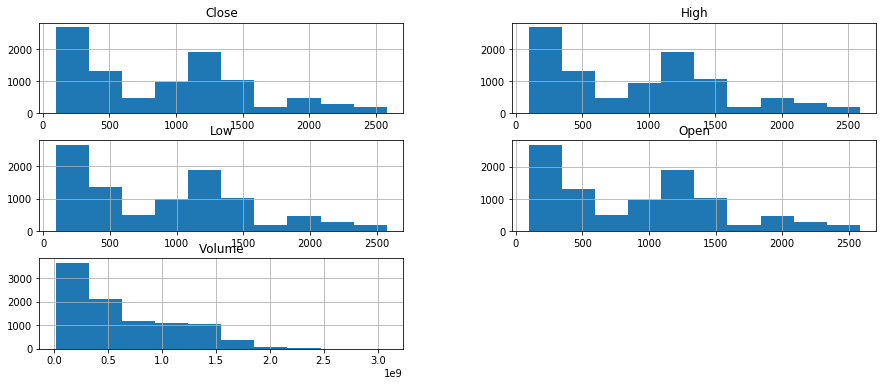

In [157]:
Actual_data.hist()
plt.show()

In [111]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
new_data = pd.read_csv('dataset.csv', index_col='Date',date_parser=dateparse)
print new_data.tail()

               Open     High      Low    Close       Volume
Date                                                       
2017-12-18  2685.92  2694.97  2685.92  2690.16  608455168.0
2017-12-19  2692.71  2694.44  2680.74  2681.47  556473472.0
2017-12-20  2688.18  2691.01  2676.11  2679.25  521377568.0
2017-12-21  2683.02  2692.64  2682.40  2684.57  511474976.0
2017-12-22  2684.22  2685.35  2678.13  2683.34          NaN


In [112]:
   # add new column to view High after 5 days later
new_data['High_after_5_days'] = new_data['High']
new_data['High_after_5_days'] = new_data['High_after_5_days'].shift(-5)
print new_data.tail(10)

               Open     High      Low    Close        Volume  \
Date                                                           
2017-12-11  2652.19  2660.33  2651.47  2659.99  5.104737e+08   
2017-12-12  2661.73  2669.72  2659.78  2664.11  5.536614e+08   
2017-12-13  2667.59  2671.88  2662.85  2662.85  5.510150e+08   
2017-12-14  2665.87  2668.09  2652.01  2652.01  5.290304e+08   
2017-12-15  2660.63  2679.63  2659.14  2675.81  1.655377e+09   
2017-12-18  2685.92  2694.97  2685.92  2690.16  6.084552e+08   
2017-12-19  2692.71  2694.44  2680.74  2681.47  5.564735e+08   
2017-12-20  2688.18  2691.01  2676.11  2679.25  5.213776e+08   
2017-12-21  2683.02  2692.64  2682.40  2684.57  5.114750e+08   
2017-12-22  2684.22  2685.35  2678.13  2683.34           NaN   

            High_after_5_days  
Date                           
2017-12-11            2694.97  
2017-12-12            2694.44  
2017-12-13            2691.01  
2017-12-14            2692.64  
2017-12-15            2685.35  
2017-12

In [113]:
#Slice this data from 1980 January to 2017 November.
# Focusing on the relavnt data and removing NaN dataset
Sliced_data = new_data['1980-01-01':'2017-11-30']

In [114]:
# Creating feature and target sets
features_list = ['Open','High','Low','Close','Volume']
target_list = 'High_after_5_days'
features = Sliced_data[features_list]
target = Sliced_data[target_list]

In [128]:
# Manually slicing 80-20 percent Training and target dataset
X_train = features['1980-01-01':'2010-04-28']
y_train = target['1980-01-01':'2010-04-28']
X_test = features['2010-04-29':]
y_test = target['2010-04-29':]


In [129]:
# Manually slicing 80-20 percent Training and validation dataset
X_val = X_train['2004-03-12':]
y_val = y_train['2004-03-12':]
X_train = X_train['1980-01-01':'2004-03-11']
y_train = y_train['1980-01-01':'2004-03-11']

In [130]:
X_train.count()

Open      6108
High      6108
Low       6108
Close     6108
Volume    6108
dtype: int64

In [131]:
#Implementation of linear regression
from sklearn.linear_model import LinearRegression
my_linear_model = LinearRegression()
my_linear_train = my_linear_model.fit(X_train,y_train)

In [132]:
val_score_linear = my_linear_model.score(X_val,y_val)
print "Linear regression Validation Score {}.".format(val_score_linear)

Linear regression Validation Score 0.981476206506.


In [133]:
my_linear_score = my_linear_model.score(X_test,y_test)
print "Linear regression Test Score {}.".format(my_linear_score)

Linear regression Test Score 0.995873747423.


In [160]:
my_linear_predict = my_linear_model.predict(X_test)

Text(0.5,1,u'Linear Regression Scatter Plot for Market after 5 Days')

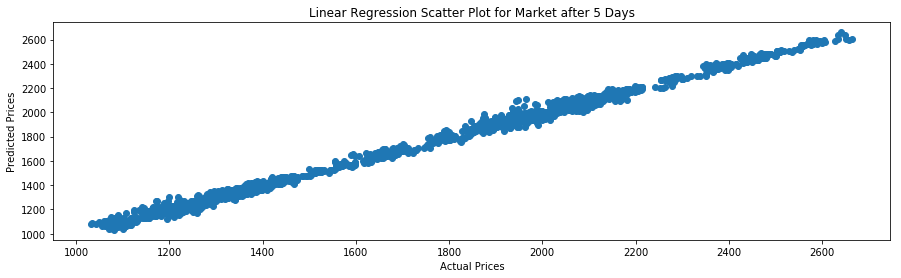

In [163]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4
plt.scatter(y_test,my_linear_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Scatter Plot for Market after 5 Days')

In [162]:
#Implementing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
my_GB_Regressor = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=None)

In [145]:
#training the Gradient Boost model
my_GB_train = my_GB_Regressor.fit(X_train,y_train)

In [146]:
val_score_Gradient = my_GB_Regressor.score(X_val,y_val)
print "Gradient Boosting regression Validation Score {}.".format(val_score_Gradient)

Gradient Boosting regression Validation Score 0.978639653062.


In [147]:
my_GB_Regressor_score = my_GB_Regressor.score(X_test,y_test)
print "Gradient Boosting regression Test Score {}.".format(my_GB_Regressor_score)

Gradient Boosting regression Test Score -0.273216917914.


In [148]:
my_GB_Regressor_predict = my_GB_Regressor.predict(X_test)

Text(0.5,1,u'Gradient Boosting Regression Scatter Plot for Market after 5 Days')

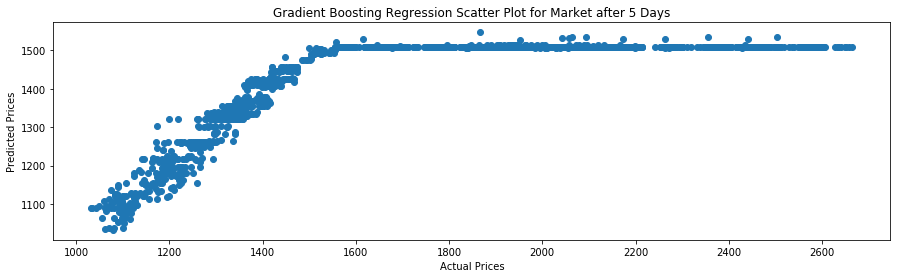

In [164]:
plt.scatter(y_test,my_GB_Regressor_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Regression Scatter Plot for Market after 5 Days')

In [150]:
#Implementing KNN Regressor
from sklearn import neighbors
my_KNN_regressor = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

In [151]:
my_KNN_regressor_train = my_KNN_regressor.fit(X_train,y_train)

In [152]:
val_score_KNN_regressor = my_KNN_regressor.score(X_val,y_val)
print "KNN regression Validation Score {}.".format(val_score_KNN_regressor)

KNN regression Validation Score -0.704391977323.


In [153]:
my_KNN_regressor_score = my_KNN_regressor.score(X_test,y_test)
print "KNN regression Test Score {}.".format(my_KNN_regressor_score)

KNN regression Test Score -5.09586587554.


In [154]:
my_KNN_regressor_predict = my_KNN_regressor.predict(X_test)

Text(0.5,1,u'KNN Regression Scatter Plot for Market after 5 Days')

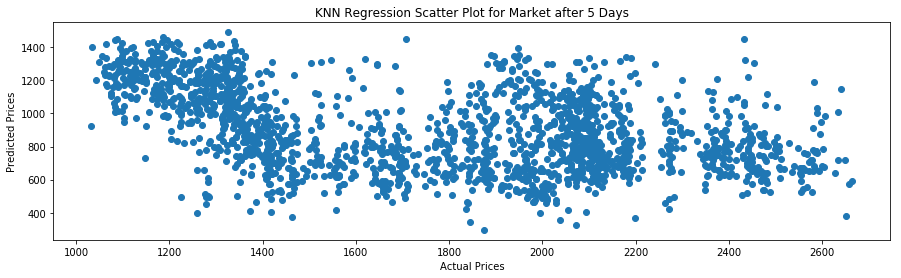

In [165]:
plt.scatter(y_test,my_KNN_regressor_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('KNN Regression Scatter Plot for Market after 5 Days')